In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


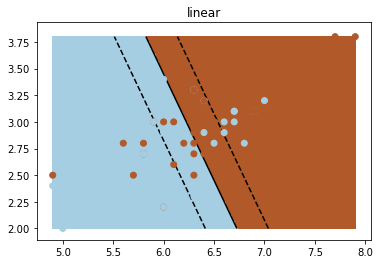

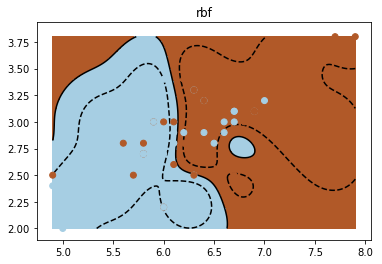

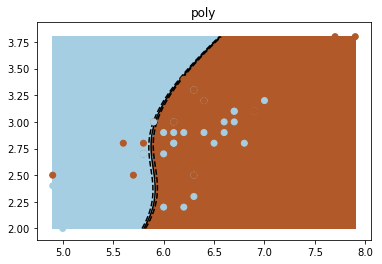

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [4]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

print(k_means.labels_[::10])

print(y_iris[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [6]:
import scipy as sp
try:
   face = sp.face(gray=True)
except AttributeError:
   from scipy import misc
   face = misc.face(gray=True)
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X) 

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [7]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")


###############################################################################
# Generate data
try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

In [8]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X) 

X_reduced = agglo.transform(X)

X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

In [9]:
whos

Variable                  Type                    Data/Info
-----------------------------------------------------------
AgglomerativeClustering   type                    <class 'sklearn.cluster.h<...>AgglomerativeClustering'>
SkipTest                  type                    <class 'unittest.case.SkipTest'>
X                         ndarray                 1797x64: 115008 elems, type `float64`, 920064 bytes (898.5 kb)
XX                        ndarray                 200x200: 40000 elems, type `float64`, 320000 bytes (312.5 kb)
X_approx                  ndarray                 1797x64: 115008 elems, type `float64`, 920064 bytes (898.5 kb)
X_iris                    ndarray                 150x4: 600 elems, type `float64`, 4800 bytes
X_reduced                 ndarray                 1797x32: 57504 elems, type `float64`, 460032 bytes (449.25 kb)
X_test                    ndarray                 10x2: 20 elems, type `float64`, 160 bytes
X_train                   ndarray                 90x